---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

# `Py3` - *Librerías de manipulación de datos*

> **Pandas**, en particular, es una útil librería de manipulación de datos que ofrece estructuras de datos para el análisis de tablas numéricas y series de tiempo. Esta es una introducción al objeto `DataFrame` y otras características básicas.

---

## Librería Pandas

Para trabajar con una gran cantidad de datos, es deseable un conjunto de herramientas que nos permitan efectuar operaciones comunes de forma intuitiva y eficiente. Pandas, es la solución por defecto para hacerlo en Python.

Esta guía está basada en ["10 minutes to pandas"](https://pandas.pydata.org/docs/getting_started/10min.html).

In [187]:
import numpy as np
import pandas as pd
import datetime

---
## 3.1 - `Series`

En Python, las `Series` corresponden a un arreglo de una dimensión que admite diversos tipos de datos (números enteros, palabras, números flotantes, objetos de Python, etc.) que además están etiquetados mediante un índice que el usuario puede definir o permitir que Python lo cree por defecto. De manera que para crear una lista de valores y dejando que Python los etiqute, se utiliza el siguiente comando:

In [116]:
s = pd.Series([1, 3, 5, np.nan, "modelos", 8.5])
s

0          1
1          3
2          5
3        NaN
4    modelos
5        8.5
dtype: object

Utilizado el comando de numpy `random.randn` para generar datos aleatorios para la lista y si se desea agregar indices distintos a los numéricos se utiliza el siguiente comando:

In [117]:
s = pd.Series(np.random.randn(5), index = ['a', 'b', 'c', 'd', 'e'])
s

a   -1.124088
b    0.465861
c   -1.403796
d   -0.437219
e   -0.146258
dtype: float64

Una vez creada la `Serie` se pueden ejecutar operaciones vetoriales con la misma o agregar atributos como un nombre, como se muestra a continuación:

In [118]:
d= pd.Series(s+s,name = 'suma')
d

a   -2.248176
b    0.931722
c   -2.807591
d   -0.874438
e   -0.292515
Name: suma, dtype: float64

---
## 3.2 - `DataFrame`

En Python, la asignación de `DataFrames` corresponde a un arreglo de 2 dimensiones etiquetado, semejante a concatenar varias `Series` y de igual forma admite varios tipos de datos, algo así como una hoja de cálculo o una tabla SQL. De igual forma la asignación de las etiquetas puede ser decidida por el usuario y Python hará coincidir los valores, en caso de diferencias en los tamaños de las listas agregadas, rellenará esos espacios siguiendo reglas de sentido común. A continuación un ejemplo de dos `Series` de diferentes tamaños:

In [119]:
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'c', 'd', 'b'])}
df1 = pd.DataFrame(d)
df1

,one,two
a,1.0,1.0
b,2.0,4.0
c,3.0,2.0
d,NaN,3.0


Estos indices también pueden indicar una estampa de tiempo, tal como se muestra en el siguiente ejemplo:

In [120]:
dates = pd.date_range('20200501', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df    

,A,B,C,D
2020-05-01,-1.438720,-1.001775,1.002984,-0.725545
2020-05-02,-1.393482,0.949427,0.089621,0.613263
2020-05-03,-1.137339,-0.207908,-0.737793,-2.144175
2020-05-04,-1.291017,-0.965923,0.096711,-1.001480
2020-05-05,0.760491,0.493574,0.392614,-1.200108
2020-05-06,0.650867,0.208342,-1.657304,-0.819852


De igual forma que las `Series`, los `DataFrame` pueden asignarse como diccionarios, utilizando diferentes tipos de datos en cada columna, como se muestra a continuación:

In [121]:
df2 = pd.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20200521'),
                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'E': pd.Categorical(["ceviche", "pizza", "nachos", "chifrijo"]),
                     'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2020-05-21,1.0,3,ceviche,foo
1,1.0,2020-05-21,1.0,3,pizza,foo
2,1.0,2020-05-21,1.0,3,nachos,foo
3,1.0,2020-05-21,1.0,3,chifrijo,foo


Una vez incializada, se pueden ejecutar acciones como extraer, eliminar e insertar de la misma manera que los diccionarios. A continuación un ejemplo: 

In [122]:
df2['E']

0     ceviche
1       pizza
2      nachos
3    chifrijo
Name: E, dtype: category
Categories (4, object): [ceviche, chifrijo, nachos, pizza]

In [123]:
del df2['C']
df2

,A,B,D,E,F
0,1.0,2020-05-21,3,ceviche,foo
1,1.0,2020-05-21,3,pizza,foo
2,1.0,2020-05-21,3,nachos,foo
3,1.0,2020-05-21,3,chifrijo,foo


In [124]:
df2['A']=pd.Series(np.random.randn(4), index=list(range(4)))
df2['mayorA1']=df2['A']>1
df2

,A,B,D,E,F,mayorA1
0,0.336258,2020-05-21,3,ceviche,foo,False
1,0.245925,2020-05-21,3,pizza,foo,False
2,1.040845,2020-05-21,3,nachos,foo,True
3,-0.751170,2020-05-21,3,chifrijo,foo,False


---
## 3.3 - Ver los datos

En Python, la visualización de datos permite decidir cuáles datos se quieren ver, por ejemplo del `DataFrame` df, para ver las primeras filas de datos se utiliza el comando `head`:

In [125]:
df.head(2)

,A,B,C,D
2020-05-01,-1.438720,-1.001775,1.002984,-0.725545
2020-05-02,-1.393482,0.949427,0.089621,0.613263


Pero si sólo se desea visualizar las útimas 3 líneas se utiliza el comando `tail`:

In [126]:
df.tail(3)

,A,B,C,D
2020-05-04,-1.291017,-0.965923,0.096711,-1.001480
2020-05-05,0.760491,0.493574,0.392614,-1.200108
2020-05-06,0.650867,0.208342,-1.657304,-0.819852


Si bien sólo se desean visualizar los indices, se utiliza:

In [127]:
df.index

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06'],
              dtype='datetime64[ns]', freq='D')

Además, en el caso de un `DataFrame` con elementos del mismo tipo de datos, se puede transformar en un dato compatible con Numpy:

In [128]:
df.to_numpy()

array([[-1.43872   , -1.00177501,  1.00298437, -0.72554541],
       [-1.39348156,  0.94942708,  0.0896212 ,  0.61326349],
       [-1.13733887, -0.20790778, -0.73779329, -2.14417456],
       [-1.29101654, -0.96592347,  0.09671108, -1.0014799 ],
       [ 0.76049082,  0.4935742 ,  0.39261434, -1.20010841],
       [ 0.65086734,  0.20834165, -1.65730362, -0.81985218]])

Incluso si el `DataFrame` tiene diversos tipos de datos, también se puede transferir los datos a un arreglo de Numpy:

In [129]:
df2.to_numpy()

array([[0.3362582902233097, Timestamp('2020-05-21 00:00:00'), 3,
        'ceviche', 'foo', False],
       [0.24592480247012838, Timestamp('2020-05-21 00:00:00'), 3,
        'pizza', 'foo', False],
       [1.04084464434323, Timestamp('2020-05-21 00:00:00'), 3, 'nachos',
        'foo', True],
       [-0.7511703966915082, Timestamp('2020-05-21 00:00:00'), 3,
        'chifrijo', 'foo', False]], dtype=object)

Sin embargo, si todos los elementos son del mismo tipo, se pueden ejecutar más funciones como una rápida revisión de las principales características estadísticas de cada columna:

In [130]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.641533,-0.087377,-0.135528,-0.879649
std,1.049243,0.790242,0.933627,0.891367
min,-1.438720,-1.001775,-1.657304,-2.144175
25%,-1.367865,-0.776420,-0.530940,-1.150451
50%,-1.214178,0.000217,0.093166,-0.910666
75%,0.203816,0.422266,0.318639,-0.749122
max,0.760491,0.949427,1.002984,0.613263


O también reordenar los datos con alguna columna de referencia:

In [131]:
df.sort_values(by='B')

,A,B,C,D
2020-05-01,-1.438720,-1.001775,1.002984,-0.725545
2020-05-04,-1.291017,-0.965923,0.096711,-1.001480
2020-05-03,-1.137339,-0.207908,-0.737793,-2.144175
2020-05-06,0.650867,0.208342,-1.657304,-0.819852
2020-05-05,0.760491,0.493574,0.392614,-1.200108
2020-05-02,-1.393482,0.949427,0.089621,0.613263


---
## 3.4 - Seleccionar datos

En Python, la selección de datos utilizando Pandas es más eficiente que las expresiones para seleccionar y obtener datos en Numpy. Por ejemplo, para ubicar una fila de datos, se puede utilizar el comando  `loc`:

In [132]:
df2.loc[2]

A                      1.04084
B          2020-05-21 00:00:00
D                            3
E                       nachos
F                          foo
mayorA1                   True
Name: 2, dtype: object

También se pueden seleccionar un rango de columnas al mismo tiempo:

In [133]:
df[0:3]

,A,B,C,D
2020-05-01,-1.438720,-1.001775,1.002984,-0.725545
2020-05-02,-1.393482,0.949427,0.089621,0.613263
2020-05-03,-1.137339,-0.207908,-0.737793,-2.144175


Para obtener una posición en específico, se debe indicar la fila y la columna mediante el comando `at`:

In [134]:
df.at[dates[2], 'A']

-1.1373388706865102

De igual forma se puede ubicar ese mismo elemento por medio de la posición en lugar de los indices, utilizando el comando `iloc`:

In [135]:
df.iloc[2, 0]

-1.1373388706865102

De igual manera se pueden ubicar los datos que cumplan con cierta condición booleana:

In [136]:
df[df['A']>0]

,A,B,C,D
2020-05-05,0.760491,0.493574,0.392614,-1.200108
2020-05-06,0.650867,0.208342,-1.657304,-0.819852


---
## 3.5 - Operaciones

En Python, las operaciones se ejecutan sobre todos los datos arrojando el valor de salida por filas o columnas, por ejemplo para calcular la media estadística de los datos de cada columna, se utiliza el comando `mean` de la siguiente manera:

In [137]:
df.mean()

A   -0.641533
B   -0.087377
C   -0.135528
D   -0.879649
dtype: float64

Si en cambio se desea conocer la media de los valores por filas, se utiliza la siguiente variación:

In [138]:
df.mean(1)

2020-05-01   -0.540764
2020-05-02    0.064708
2020-05-03   -1.056804
2020-05-04   -0.790427
2020-05-05    0.111643
2020-05-06   -0.404487
Freq: D, dtype: float64

También se pueden aplicar operaciones tales como el conteo sobre dichos datos:

In [139]:
f = pd.Series(np.random.randint(0, 7, size=10))
f

0    5
1    0
2    4
3    1
4    1
5    6
6    1
7    5
8    6
9    2
dtype: int32

In [140]:
f.value_counts()

1    3
6    2
5    2
4    1
2    1
0    1
dtype: int64

También existen operaciones que se pueden aplicar sobre `Series` de palabras:

In [141]:
g = pd.Series(['ARbOL', 'BLanCO', 'AvE', 'BuRRo', np.nan])
g.str.lower()

0     arbol
1    blanco
2       ave
3     burro
4       NaN
dtype: object

---
## 3.6 - Fusionar datos

En Python, para concatenar datos se utiliza el comando `concat()` de la siguiente forma:

In [142]:
df = pd.DataFrame(np.random.randn(10,2))
df2 = pd.DataFrame(np.random.randn(10,2))
pieces = [df[:], df2[:]]
pd.concat(pieces)

,0,1
0,-1.114509,0.335679
1,0.420652,-0.143768
2,-1.511412,0.290205
3,-0.319198,0.575385
4,-0.200441,-0.145279
5,0.077536,-0.599292
6,1.172419,-0.263597
7,0.589820,-0.561852
8,0.294062,-0.019284
9,-1.946265,0.025824


---
## 3.7 - Agrupar datos

En Python, la agrupación se refiere a:
- Separar los datos en grupos basandose en un criterio.
- Aplicar una función a cada grupo independientemente.
- Combinar los resultados en una estructura de datos.
A continuación un ejemplo de agrupación aplicando una suma a los datos:

In [143]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo',
                         'bar', 'foo', 'foo'],
                  'B': ['one', 'one', 'two', 'three', 'two',
                       'two', 'one', 'three'],
                  'C': np.random.randn(8),
                  'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.142607,0.648502
1,bar,one,-0.722310,-1.143858
2,foo,two,0.139778,-1.313456
3,bar,three,-2.288673,0.232728
4,foo,two,1.110147,-1.641392
5,bar,two,-0.008290,-1.371454
6,foo,one,-0.149783,0.942481
7,foo,three,0.495100,0.158854


In [144]:
df.groupby('A').sum()

,C,D
A,,
bar,-3.019273,-2.282583
foo,1.452635,-1.205011


In [145]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.722310 -1.143858
    three -2.288673  0.232728
    two   -0.008290 -1.371454
foo one   -0.292390  1.590983
    three  0.495100  0.158854
    two    1.249925 -2.954848

---
## 3.8 - Reacomodar datos

En Python, una forma de reacomodar los datos es comprimiendolos mediante el comando `stack`:

In [146]:
stacked = df.stack()
stacked

0  A           foo
   B           one
   C     -0.142607
   D      0.648502
1  A           bar
   B           one
   C      -0.72231
   D      -1.14386
2  A           foo
   B           two
   C      0.139778
   D      -1.31346
3  A           bar
   B         three
   C      -2.28867
   D      0.232728
4  A           foo
   B           two
   C       1.11015
   D      -1.64139
5  A           bar
   B           two
   C   -0.00829022
   D      -1.37145
6  A           foo
   B           one
   C     -0.149783
   D      0.942481
7  A           foo
   B         three
   C        0.4951
   D      0.158854
dtype: object

También se puede cambiar la forma de ordenar los datos como tablas de pivot:

In [147]:
df=pd.DataFrame({'A': ['one', 'one', 'two', 'three']*3,
                'B': ['A', 'B', 'C']*4,
                'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar']*2,
                'D': np.random.randn(12),
                'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.238635,-1.649049
1,one,B,foo,1.347773,-0.519648
2,two,C,foo,2.193222,-0.517296
3,three,A,bar,0.144136,0.665141
4,one,B,bar,-0.214475,-0.298625
5,one,C,bar,-1.021996,-1.126982
6,two,A,foo,0.957939,0.133001
7,three,B,foo,0.236537,-0.245365
8,one,C,foo,0.160371,-0.606876
9,one,A,bar,-0.272002,-2.279926


In [148]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.272002  0.238635
      B -0.214475  1.347773
      C -1.021996  0.160371
three A  0.144136       NaN
      B       NaN  0.236537
      C  0.100551       NaN
two   A       NaN  0.957939
      B -0.533063       NaN
      C       NaN  2.193222

---
## 3.9 - Series de tiempo

En Python, la asignación de series de tiempo permite generar secuencias con una frecuencia fija y un lapso de tiempo, como por ejemplo:

In [156]:
dti = pd.date_range('1-5-2020', periods=3, freq='H')
dti

DatetimeIndex(['2020-01-05 00:00:00', '2020-01-05 01:00:00',
               '2020-01-05 02:00:00'],
              dtype='datetime64[ns]', freq='H')

Cuya hora se puede convertir a una zona horaria diferente, como Central Time:

In [159]:
dti = dti.tz_localize('UTC')
dti

DatetimeIndex(['2020-01-05 00:00:00+00:00', '2020-01-05 01:00:00+00:00',
               '2020-01-05 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')

O el Pacífico de los Estados Unidos:

In [167]:
dti.tz_convert('US/Pacific')

DatetimeIndex(['2020-01-04 16:00:00-08:00', '2020-01-04 17:00:00-08:00',
               '2020-01-04 18:00:00-08:00'],
              dtype='datetime64[ns, US/Pacific]', freq='H')

También se pueden convertir una serie de tiempo a una frecuencia particular:

In [168]:
idx = pd.date_range('2020-05-01', periods=5, freq='H')
ts = pd.Series(range(len(idx)), index=idx)
ts

2020-05-01 00:00:00    0
2020-05-01 01:00:00    1
2020-05-01 02:00:00    2
2020-05-01 03:00:00    3
2020-05-01 04:00:00    4
Freq: H, dtype: int64

In [169]:
ts.resample('2H').mean()

2020-05-01 00:00:00    0.5
2020-05-01 02:00:00    2.5
2020-05-01 04:00:00    4.0
Freq: 2H, dtype: float64

---
## 3.10 - Gráficas

En Python, se utiliza la asignación estándar para utilizar los comandos del API de `matplotlib`, con el cuál se puede graficar una `Serie` de datos:

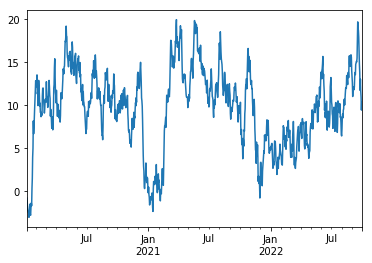

In [173]:
import matplotlib.pyplot as plt
plt.close('all')
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/5/2020', periods=1000))
ts = ts.cumsum()
ts.plot()

También se pueden graficar arreglos del tipo `DataFrame` de manera que se grafican varias curvas en una misma gráfica como se muestra a continuación:

<Figure size 432x288 with 0 Axes>

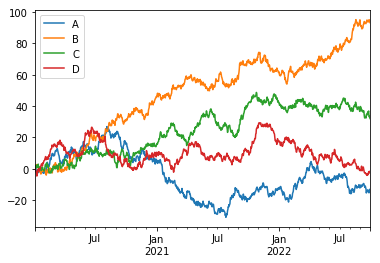

In [172]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                 columns=['A', 'B', 'C', 'D'])
df=df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

---
## 3.11 - Importar y exportar datos

En Python, se puede escribir en un archivo de excel mediante el siguiente comando:

In [195]:
df.to_csv('modelos')

Cuyo contenido se puede llamar desde python utilizando el comando:

In [196]:
pd.read_csv('modelos')

,Unnamed: 0,A,B,C,D
0,2020-01-05,1.578467,1.046580,0.768684,0.120352
1,2020-01-06,1.108046,0.834367,0.039375,-1.132746
2,2020-01-07,-0.140812,0.781934,1.078894,-1.306276
3,2020-01-08,-0.966631,1.684931,2.266512,-2.280685
4,2020-01-09,-2.159600,2.633410,1.508797,-3.029249
5,2020-01-10,-1.509164,0.965633,0.750043,-4.698713
6,2020-01-11,-2.430032,1.558558,1.211158,-3.414235
7,2020-01-12,-2.334888,1.917398,1.115480,-2.433254
8,2020-01-13,-2.149272,1.523294,2.672400,-1.024708
9,2020-01-14,-2.454048,2.635852,2.882226,-0.211721


---
### Más información

* [Página web](https://www.google.com/)
* Libro o algo
* Tutorial [w3schools](https://www.w3schools.com/python/)
---

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---